# Uncertainty Calculations

The *uncertainties* package allows you to perform calculations on numbers with uncertainties.  It handles the propagation of uncertainties for you.  The following line can be used to install (or upgrade) the package in Anaconda or Google Colabaoratory.

In [ ]:
pip install --upgrade uncertainties

## Individual Numbers with Uncertainties

The following import statements make the parts of the package for inidividual numbers available.

In [3]:
from uncertainties import ufloat, ufloat_fromstr
from uncertainties.umath import *

There are multiple ways to create a variable like $2.0 \pm 0.2$.  With the **`ufloat`** function, the two arguments are the number and its uncertainty. 

In [ ]:
r = ufloat(2.0, 0.2)
print(r)

2.00+/-0.20


Using the **`ufloat_fromstr`** function, the the number and its uncertainty are entered as strings (between double quotes).  The second example is equivalent to $(4.1 \pm 0.3)\times 10^{-4}$.

In [ ]:
s = ufloat_fromstr("3.2 +/- 0.4")
t = ufloat_fromstr("(4.1 +/- 0.3)e-4")  # factored exponential
print(s)
print(t)

3.2+/-0.4
0.000410+/-0.000030


Calculations can be performed just as for ordinary numbers, but the uncertainties are propagated automatically.

In [ ]:
square = r**2
print(square)
product = s*t
print(product)

4.0+/-0.8
0.00131+/-0.00019


You can also access the number (nominal value) and the uncertainty (standard deviation) separately. 

In [ ]:
print(square.nominal_value)
print(square.std_dev)

4.0
0.8


It is possible to perform calculations involving mathematical functions (see a list a the end of this tutorial).

In [ ]:
print(sin(1+r**2))

-0.96+/-0.23


## Arrays of Numbers with Uncertainties

The following import statement makes it possible to use arrays of numbers with uncertainties. 

In [ ]:
from uncertainties import unumpy

The **`unumpy.uarray`** function takes lists of the nominal values and their uncertainties.

In [ ]:
y = unumpy.uarray([1, 4, 9, 16], [0.1, 0.2, 0.3, 0.4])
print(y)

[1.0+/-0.1 4.0+/-0.2 9.0+/-0.3 16.0+/-0.4]


The numbers (nominal values) and the uncertainties (standard deviations) can be accessed as follows. 

In [ ]:
print(unumpy.nominal_values(y))
print(unumpy.std_devs(y))

[ 1.  4.  9. 16.]
[0.1 0.2 0.3 0.4]


You can perform calculations on the elements of the array.  The list of functions that can follow "unumpy" are listed at the end of this tutorial.

In [ ]:
print(unumpy.sqrt(y))

[1.0+/-0.05 2.0+/-0.05 3.0+/-0.049999999999999996 4.0+/-0.05]


In [ ]:
print(unumpy.cos(y))

[0.5403023058681398+/-0.08414709848078966
 -0.6536436208636119+/-0.15136049906158566
 -0.9111302618846769+/-0.12363554557252697
 -0.9576594803233847+/-0.11516132666602613]


It is often useful to find an average (mean) of the elements of an array.

In [ ]:
print(y.mean())

7.50+/-0.14


As an example, suppose that you have data for variables $x$ and $y$, where there are uncertainties for the values of $y$. It is easy to make a plot of $\log(y)$ vs. $\log(x)$ with appropriate error bars.

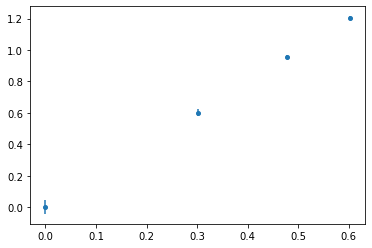

In [ ]:
import pylab as pl

x = pl.array([1,2,3,4]) 
logx = pl.log10(x)
logy = unumpy.log10(y)
pl.figure()
pl.errorbar(logx, unumpy.nominal_values(logy), unumpy.std_devs(logy), 
         ls='None', marker='o', ms=4)
pl.show()

## Additional Documentation
More information is available at:  
http://pythonhosted.org/uncertainties/  

A list of the mathematical functions that work on numbers with uncertainties is below. If there is one argument it is called $x$ in the description.  If there is a second argument, it is called $y$.  

| Individual Number | Array of Numbers | Function Description |
|:-----:|:-------:|:---------------|
|  acos  | unumpy.arccos | Return the arc cosine (in radians) | 
|  acosh  | unumpy.arccosh | Return the inverse hyperbolic cosine |
|  asin  | unumpy.arcsin | Return the arc sine (in radians) |
|  asinh  | unumpy.asinh | Return the inverse hyperbolic sine |
|  atan  | unumpy.arctan | Return the arc tangent (in radians) |
|  atan2  | unumpy.arctan2 | Return the arc tangent (in radians) of y/x (signs of both x and y are considered) |
|  atanh  | unumpy.arctanh | Return the inverse hyperbolic tangent |
|  ceil  | unumpy.ceil | Return the smallest integer >= x |
|  copysign  | unumpy.copysign | Return a float with the magnitude (absolute value) of x but the sign of y |
|  cos  | unumpy.cos | Return the cosine of x (measured in radians) |
|  cosh  | unumpy.cosh | Return the hyperbolic cosine |
|  degrees  | unumpy.degrees | Convert angle from radians to degrees |
|  erf  | unumpy.erf | Returns the error function |
|  erfc  | unumpy.erfc | Returns the complementary error function |
|  exp  | unumpy.exp | Return e raised to the power of x |
|  expm1  | unumpy.expm1 | Return exp(x)-1 avoiding the loss of precision for small x |
|  fabs  | unumpy.fabs | Return the absolute value of the float x |
|  factorial  |  | Return x! (error if x is negative or non-integer) |
|  floor  | unumpy.floor | Returns the largest integer <= x |
|  fmod  | unumpy.fmod | Returns x modulo y |
|  frexp  |  | Return the mantissa (m) and exponent (e) of x such that x = m \* 2\*\*e |
|  gamma  | unumpy.gamma | Returns the Gamma function |
|  hypot  | unumpy.hypot | Return the Euclidean distance, sqrt(x\*x + y\*y) |
|  isinf  | unumpy.isinf | Return True if x is a positive or negative infinity, and False otherwise |
|  isnan  | unumpy.isnan | Return True if x is a NaN (not a number), and False otherwise |
| ldexp   | unumpy.ldexp | Return x \* (2 \*\*i) |
| lgamma   | unumpy.lgamma | Return the atural logarithm of absolute value of Gamma function |
| log   | unumpy.log | Return the logarithm of x to the base y; if the base not specified, returns the natural logarithm (base e) |
| log10   | unumpy.log10 | Return the base 10 logarithm |
| log1p   | unumpy.log1p | Return the natural logarithm of 1+x (base e) in a way which is accurate for x near zero |
| modf   | unumpy.modf | Return the fractional and integer parts of x |
| pow   | unumpy.pow | Return x to the power of y |
| radians   | unumpy.radians | Convert angle from degrees to radians |
| sin   | unumpy.sin | Return the sine of x (measured in radians) |
| sinh   | unumpy.sinh | Return the hyperbolic sine |
| sqrt   | unumpy.sqrt | Return the square root |
| tan   | unumpy.tan | Return the tangent of x (measured in radians) |
| tanh   | unumpy.tanh | Return the hyperbolic tangent |
| trunc   | unumpy.trunc | Truncates x to the nearest integer toward 0 |